In [18]:
%load_ext autoreload
%autoreload 2
%aimport

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
all-except-skipped

Modules to skip:



In [19]:
%matplotlib inline

In [20]:
from relaxed.plot_defaults import *

In [21]:
import numpy as np
import astropy
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt 
import re 
from astropy.table import Table
import astropy.table
import json
from scipy import stats
from copy import deepcopy
import scipy
import warnings

import matplotlib as mpl
from sklearn.model_selection import train_test_split


In [22]:
from relaxed.analysis import setup, get_quantiles, gaussian_conditional, get_am, get_a2_from_am, get_lam

In [23]:
# catalog
hcat, indices, scales = setup('m11', path='../../output')
cvir = hcat.cat['cvir']

# obtain a_m
am, mass_bins = get_am('m11', min_mass=0.1, path='../../output')
a2 = get_a2_from_am(am, mass_bins)

# throw away first & last, useless bin (a = 1.00 always for that)
am = am[:, 1:-1]
mass_bins = mass_bins[1:-1]
print(am.shape, mass_bins.shape, a2.shape, cvir.shape)

(9999, 98) (98,) (9999,) (9999,)


In [24]:
 # remove nan's from lam along the way, like ~600 haloes.
keep, lam, cvir, a2 = get_lam(am, cvir, a2)
am = am[keep]
print(sum(keep), lam.shape, cvir.shape, a2.shape, am.shape)

9449 (9449, 98) (9449,) (9449,) (9449, 98)


In [25]:
# train/test split.
lam_train, lam_test, cvir_train, cvir_test, a2_train, a2_test = train_test_split(lam, cvir, a2, test_size=0.33)
print(cvir_train.shape)
print(cvir_test.shape)

(6330,)
(3119,)


## Train and plot quantile transform.

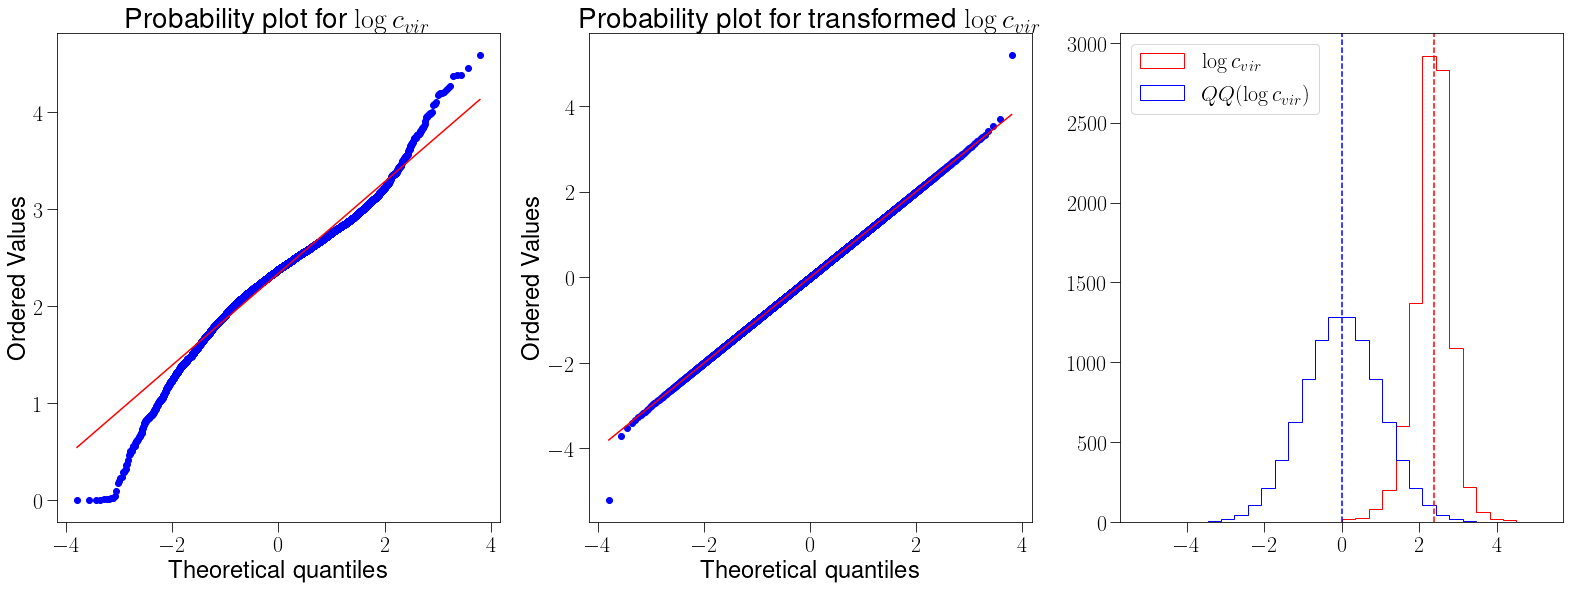

In [58]:
# gaussian remapping
from sklearn.preprocessing import QuantileTransformer
# rng = np.random.RandomState(304)
qt = QuantileTransformer(n_quantiles=len(cvir), output_distribution='normal')
qt = qt.fit(np.log(cvir.reshape(-1, 1)))
lcvir_trans = qt.transform(np.log(cvir).reshape(-1, 1))
fig, axes = plt.subplots(1, 3, figsize=(27, 9))
ax1, ax2, ax3 = axes.flatten()
res = stats.probplot(np.log(cvir).reshape(-1), dist='norm', plot=ax1)
res = stats.probplot(lcvir_trans.reshape(-1), dist='norm', plot=ax2)
ax1.set_title(r"Probability plot for $\log c_{vir}$")
ax2.set_title(r"Probability plot for transformed $\log c_{vir}$")

bins = get_bins(lcvir_trans, bins=30)
draw_histogram(ax3, np.log(cvir), bins=bins, color='r', label=r'$\log c_{vir}$')
draw_histogram(ax3, lcvir_trans, bins=bins, color='b', label=r'$QQ(\log c_{vir})$')

ax3.legend(loc=0)



In [ ]:
np.sort(cvir)

In [53]:
qt.inverse_transform(np.array([-2]).reshape(-1, 1))

array([[1.24260395]])

In [ ]:
qt.

In [47]:
np.sort(lcvir_trans.reshape(-1))

array([-5.19933758, -5.19933758, -3.60181297, ...,  5.19933758,
        5.19933758,  5.19933758])

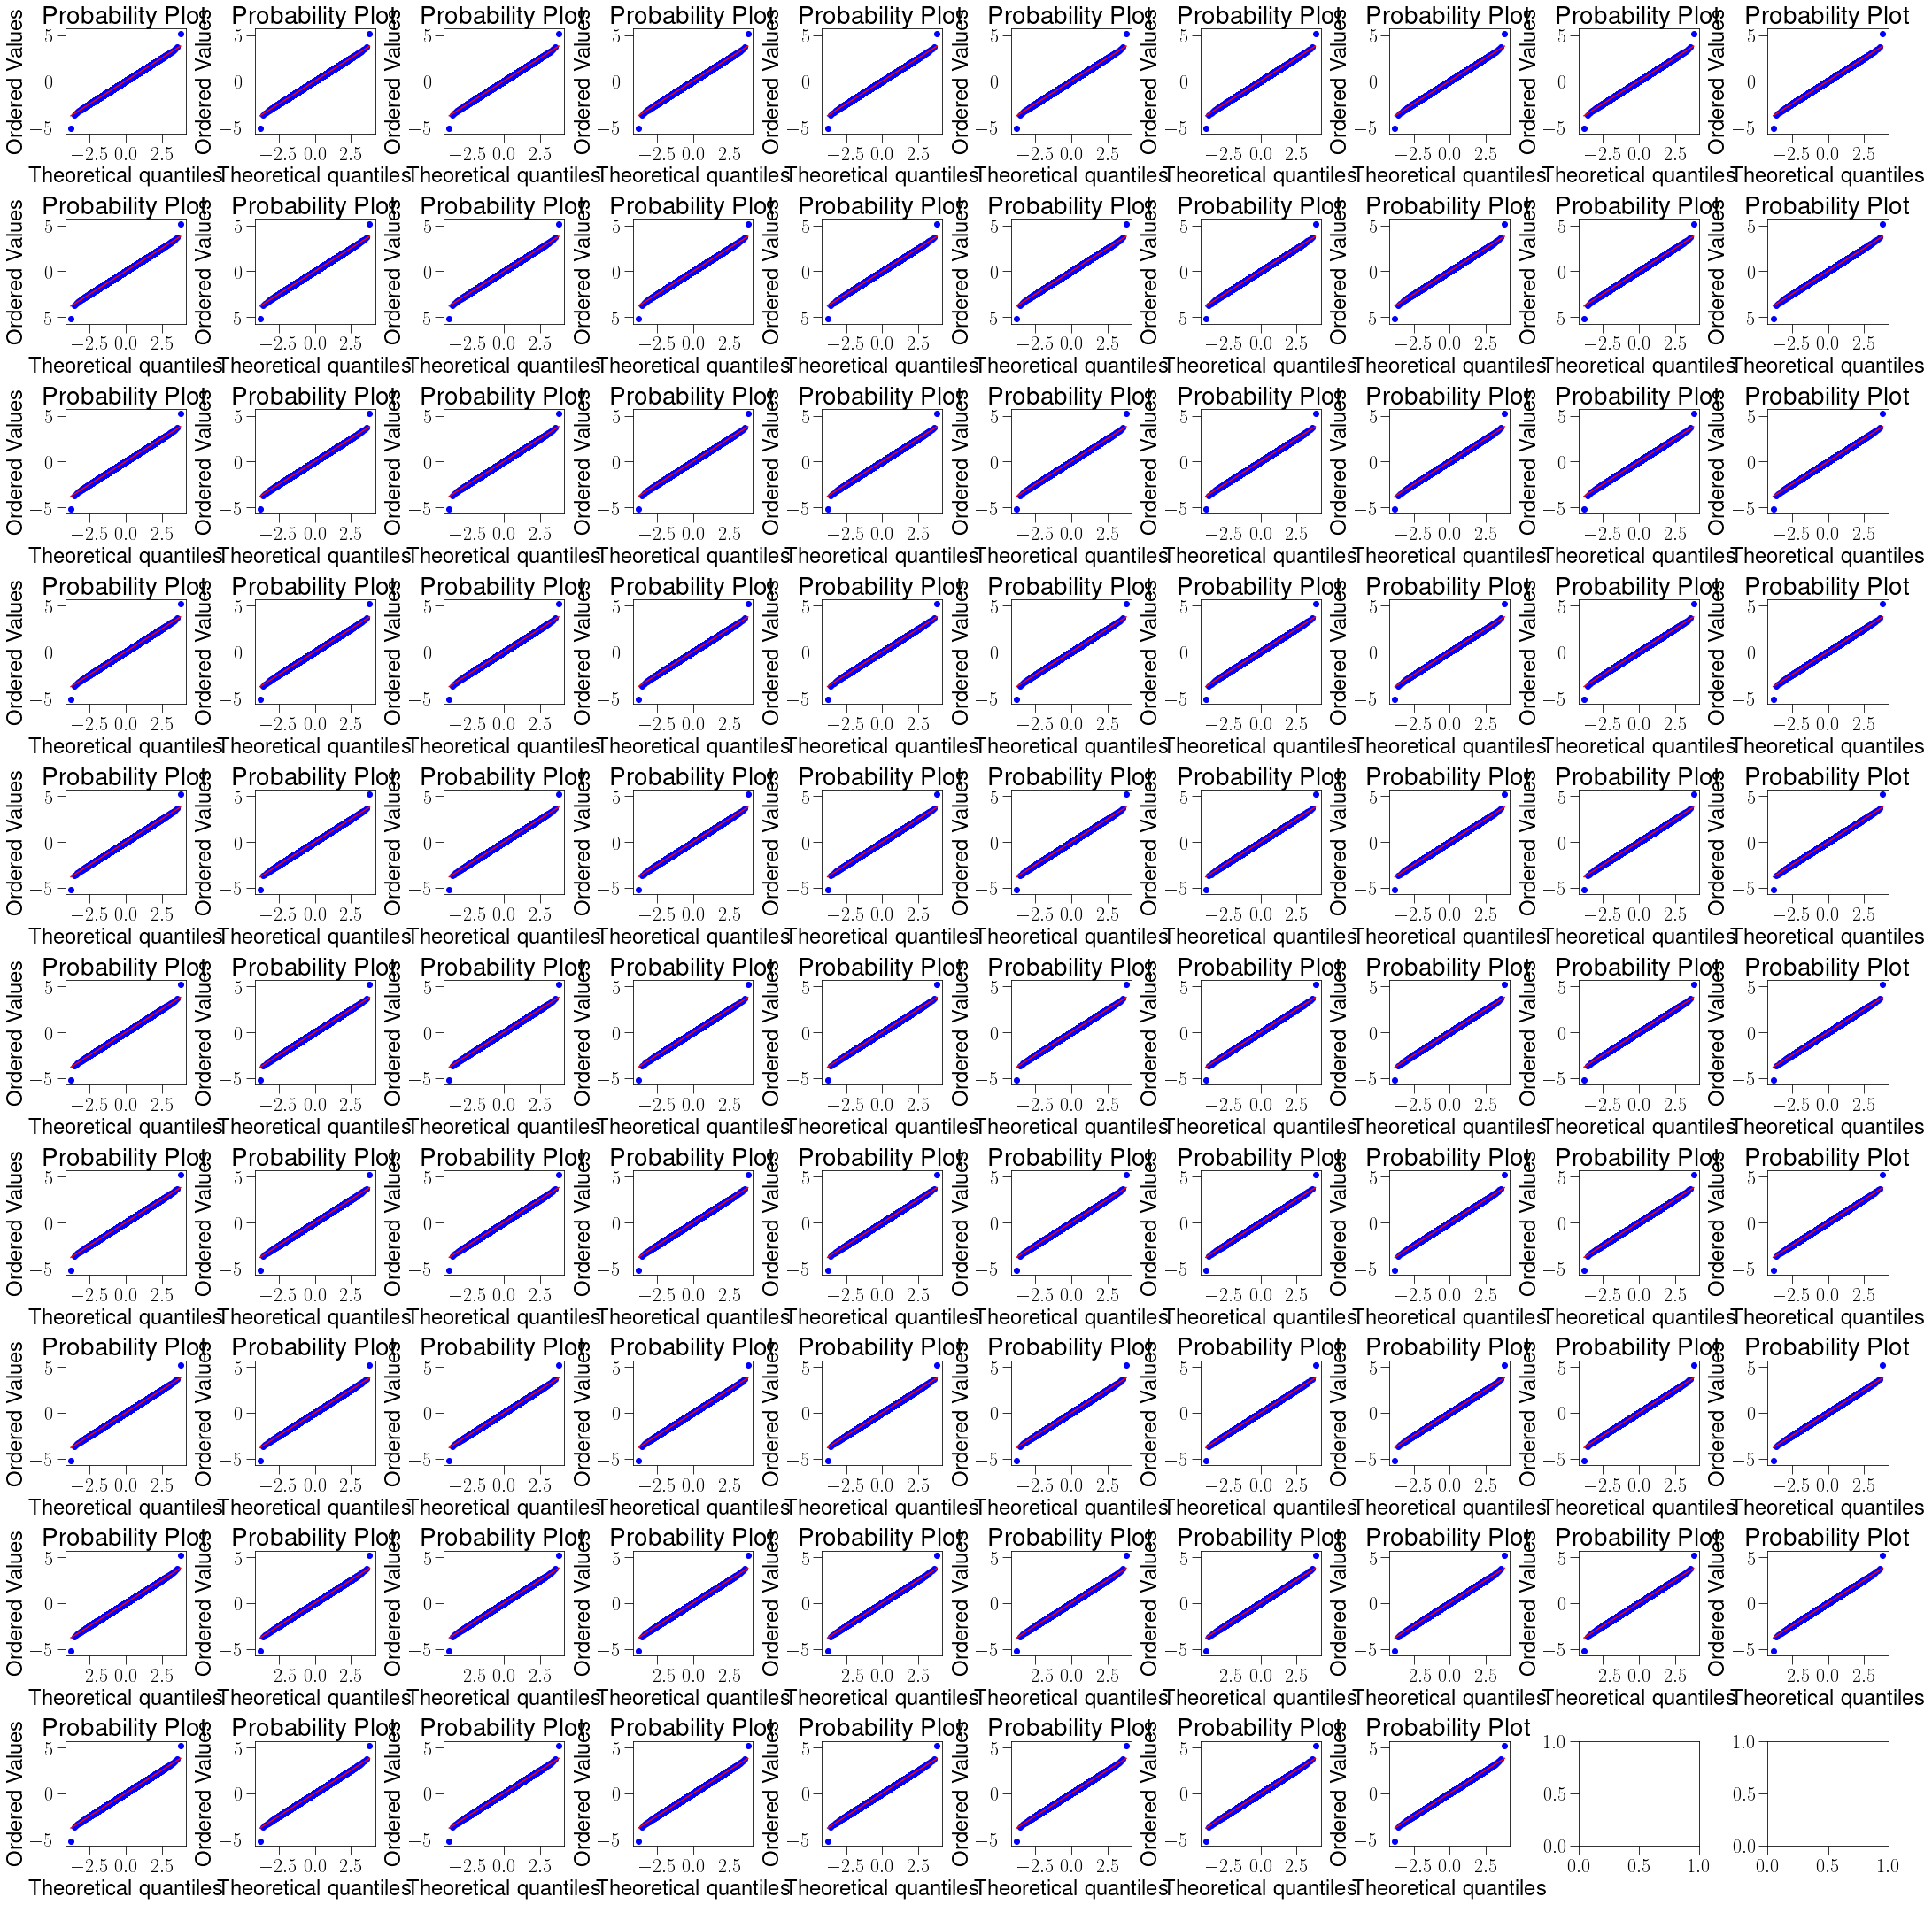

In [59]:
# try on lam
qt = QuantileTransformer(n_quantiles=len(lam), output_distribution='normal')
lam_trans = qt.fit(lam).transform(lam)

fig, axes = plt.subplots(10, 10, figsize=(30,30))
axes = axes.flatten()
for i in range(98):
    ax = axes[i]
    stats.probplot(lam_trans[:, i], dist='norm', plot=ax)

plt.tight_layout()


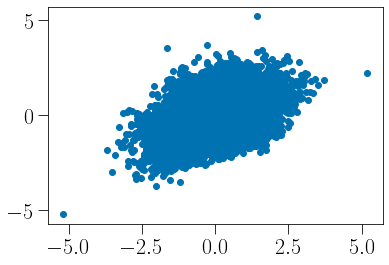

In [71]:
plt.scatter(lam_trans[:, 30], lam_trans[:, 90])

In [60]:
lam_trans[:, -1]

array([-2.38355148,  1.38391521,  1.70571602, ...,  0.69224944,
       -0.24655868, -0.70852416])

In [56]:
np.sort(lam_trans[:, -2])

array([-5.19933758, -5.19933758, -3.60181297, ...,  5.19933758,
        5.19933758,  5.19933758])